In [1]:
#!pip install pymc

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import scipy.stats as stats
import pymc as pm
import arviz as az

sns.set_style("whitegrid")

print(pm.__version__)
print(az.__version__)

5.7.2
0.16.1


In [2]:
df1 = pd.read_csv('data_01.csv')
df2 = pd.read_csv('data_02.csv')
df3 = pd.read_csv('data_03.csv')
df4 = pd.read_csv('data_04.csv')
df5 = pd.read_csv('data_05.csv')
df6 = pd.read_csv('data_06.csv')


In [3]:
y = np.array(df1['y'])
x = np.array(df1['x'])

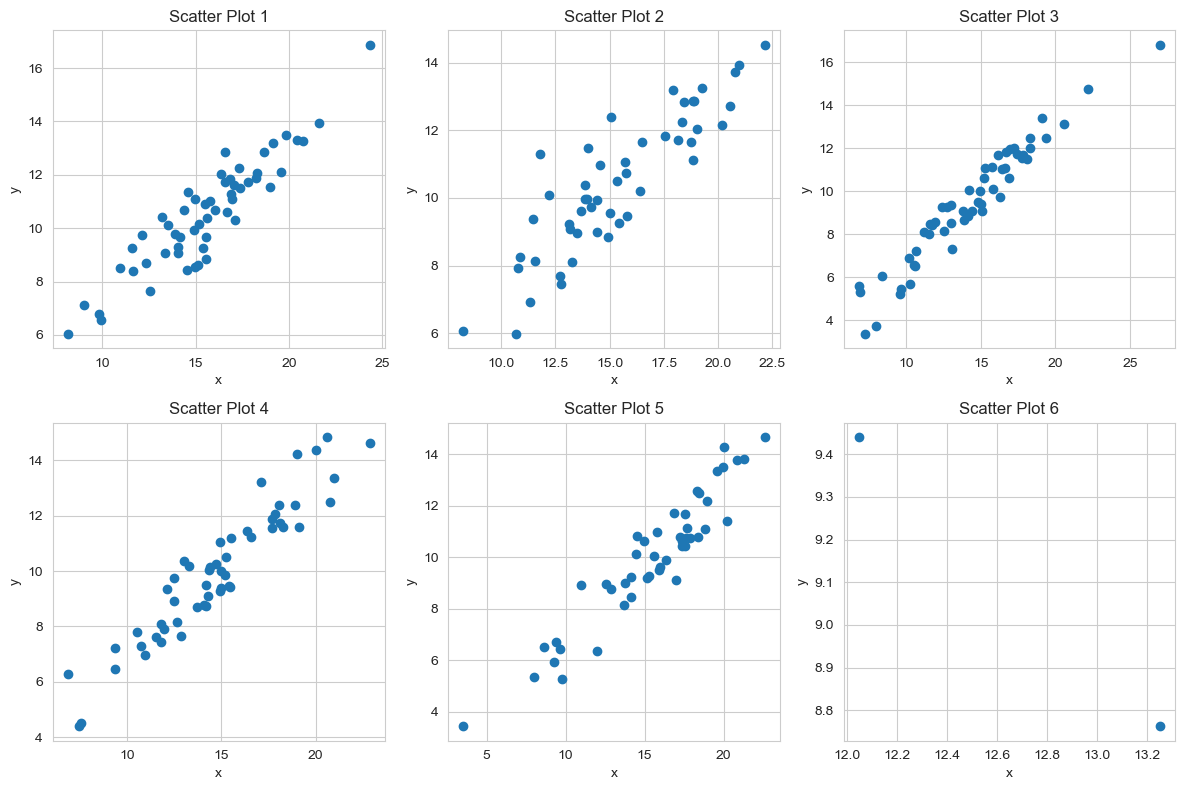

In [4]:
import matplotlib.pyplot as plt


dataframes = [df1, df2, df3, df4, df5, df6]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

axes = axes.flatten()

for i, (df, ax) in enumerate(zip(dataframes, axes)):
    x = df['x']
    y = df['y']
    
    ax.scatter(x, y)
    ax.set_title(f"Scatter Plot {i+1}")
    ax.set_xlabel('x')
    ax.set_ylabel('y')

plt.tight_layout()
plt.show()

In [5]:
all_df = pd.concat([df1, df2, df3, df4, df5, df6], axis=0)

y = np.array(all_df['y'])
x = np.array(all_df['x'])

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [α_tmp, β, ε, ν]


Sampling 3 chains for 1_000 tune and 500 draw iterations (3_000 + 1_500 draws total) took 16 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


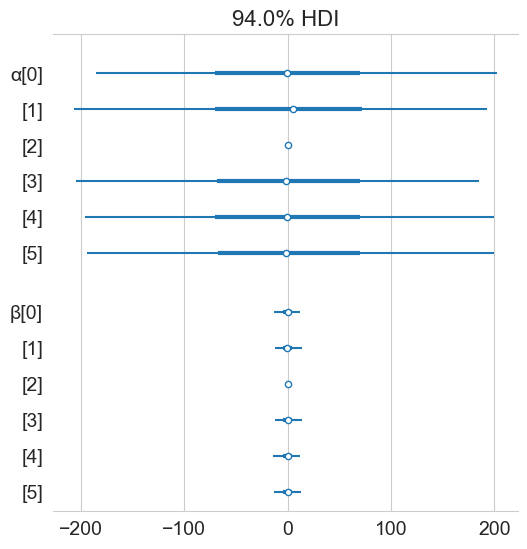

In [6]:
x_centered = x - x.mean()
idx = 2
M = 6
with pm.Model() as unpooled_model:
    α_tmp = pm.Normal('α_tmp', mu=0, sigma=7, shape=M)
    β = pm.Normal('β', mu=0, sigma=7, shape=M)
    ε = pm.HalfCauchy('ε', 5)
    ν = pm.Exponential('ν', 1/25)

    y_pred = pm.StudentT('y_pred', mu=α_tmp[idx] + β[idx] * x_centered,
                         sigma=ε, nu=ν, observed=y)

    α = pm.Deterministic('α', α_tmp - β * x.mean())

    trace_up = pm.sample(500)
az.plot_forest(trace_up, var_names=['α', 'β'], combined=True);

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α_tmp[0],-0.056,7.153,-13.799,12.971,0.127,0.214,3256.0,1090.0,1.00
α_tmp[1],-0.010,7.226,-12.865,14.218,0.128,0.225,3172.0,1054.0,1.00
α_tmp[2],10.046,0.052,9.950,10.143,0.001,0.001,2635.0,1150.0,1.00
α_tmp[3],0.050,7.197,-13.684,12.914,0.128,0.224,3181.0,1160.0,1.00
α_tmp[4],0.188,7.016,-12.527,13.132,0.127,0.193,3108.0,1146.0,1.01
α_tmp[5],-0.094,6.991,-12.677,12.535,0.135,0.186,2636.0,1245.0,1.00
β[0],-0.123,6.835,-13.584,12.159,0.122,0.206,3137.0,1052.0,1.00
β[1],-0.059,7.111,-12.459,14.162,0.149,0.208,2280.0,963.0,1.00
β[2],0.614,0.014,0.586,0.639,0.000,0.000,3112.0,1258.0,1.00
β[3],0.059,6.851,-12.431,14.012,0.117,0.203,3426.0,1121.0,1.00


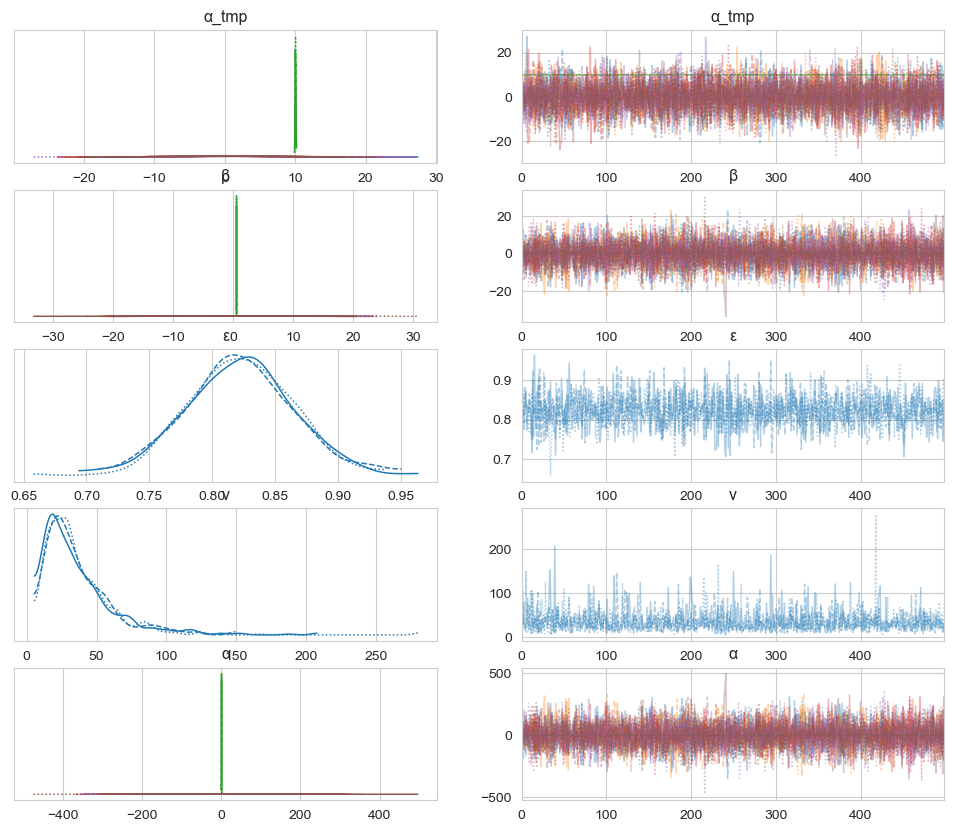

In [7]:
az.plot_trace(trace_up)
az.summary(trace_up)

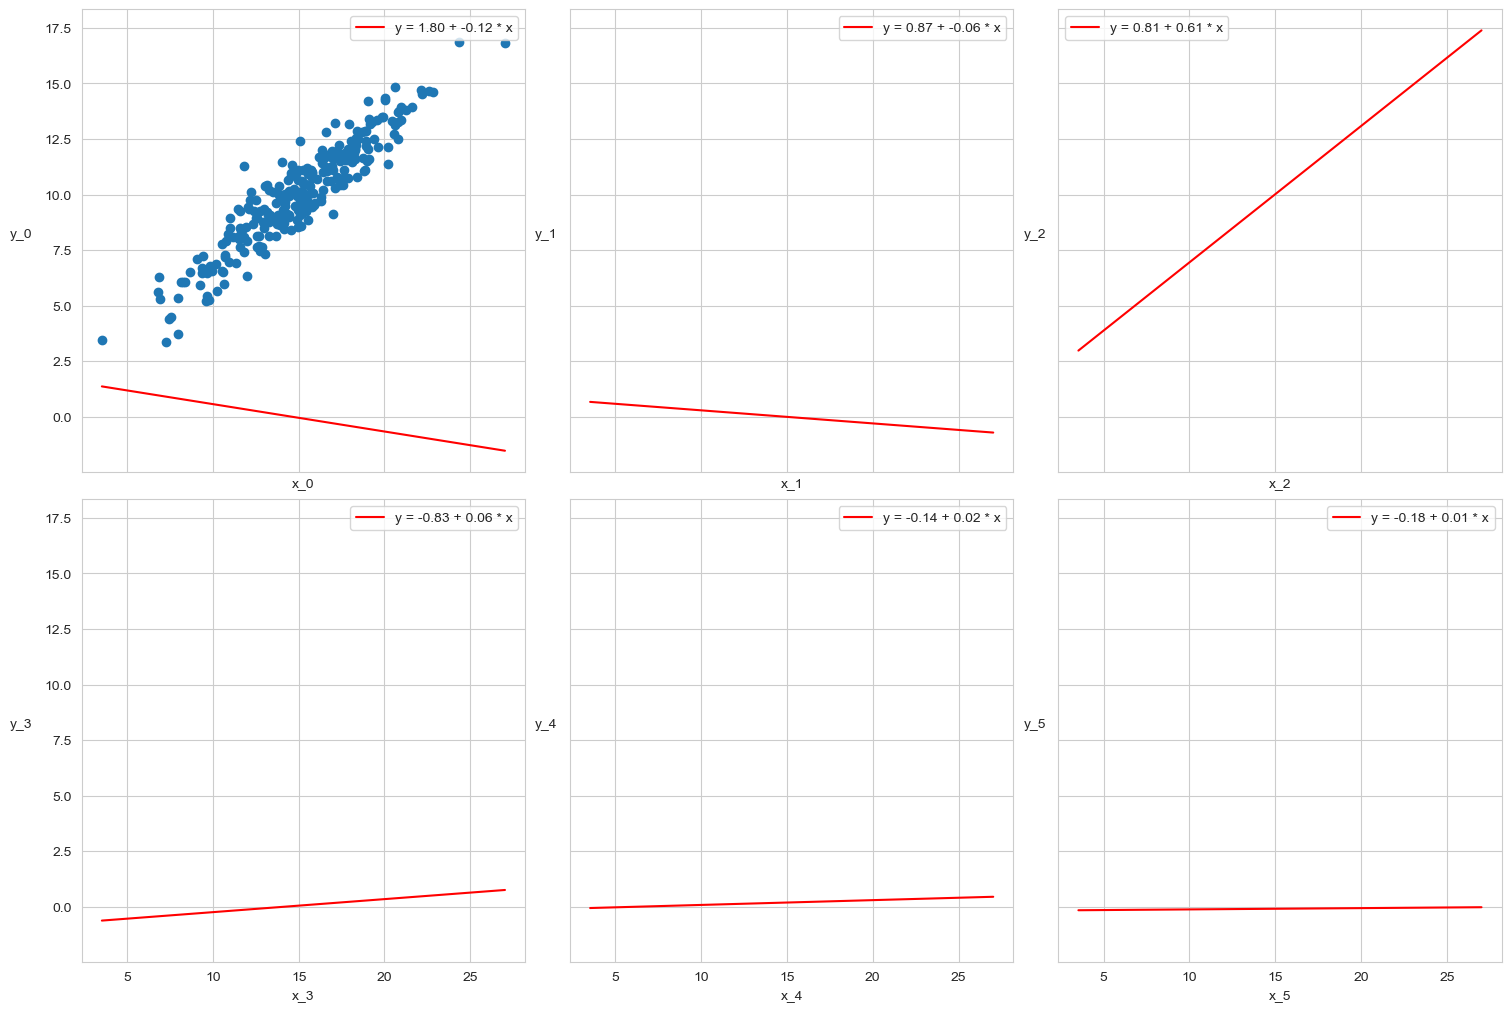

In [8]:
_, ax = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True,
                     constrained_layout=True)

trace_hmm = trace_up.posterior.stack(samples={"chain", "draw"})
trace_upp = trace_up.posterior.stack(samples={"chain", "draw"})


ax = np.ravel(ax)
j, k = 0, len(x)
x_range = np.linspace(x.min(), x.max(), 10)

for i in range(M):
    ax[i].scatter(x[j:k], y[j:k])
    ax[i].set_xlabel(f'x_{i}')
    ax[i].set_ylabel(f'y_{i}', labelpad=17, rotation=0)
    alpha_m = trace_hmm['α'].sel({'α_dim_0':i}).mean().item()
    beta_m  = trace_hmm['β'].sel({'β_dim_0':i}).mean().item()
    ax[i].plot(x_range, alpha_m + beta_m * x_range, c='r',
               label=f'y = {alpha_m:.2f} + {beta_m:.2f} * x')

    ax[i].legend()
    j += len(x)
    k += len(x)